In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("breast_cancer.csv")

In [3]:
df.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Clump Thickness              683 non-null    int64
 1   Uniformity of Cell Size      683 non-null    int64
 2   Uniformity of Cell Shape     683 non-null    int64
 3   Marginal Adhesion            683 non-null    int64
 4   Single Epithelial Cell Size  683 non-null    int64
 5   Bare Nuclei                  683 non-null    int64
 6   Bland Chromatin              683 non-null    int64
 7   Normal Nucleoli              683 non-null    int64
 8   Mitoses                      683 non-null    int64
 9   Class                        683 non-null    int64
dtypes: int64(10)
memory usage: 53.5 KB


In [8]:
df["Class"].unique

<bound method Series.unique of 0      2
1      2
2      2
3      2
4      2
      ..
678    2
679    2
680    4
681    4
682    4
Name: Class, Length: 683, dtype: int64>

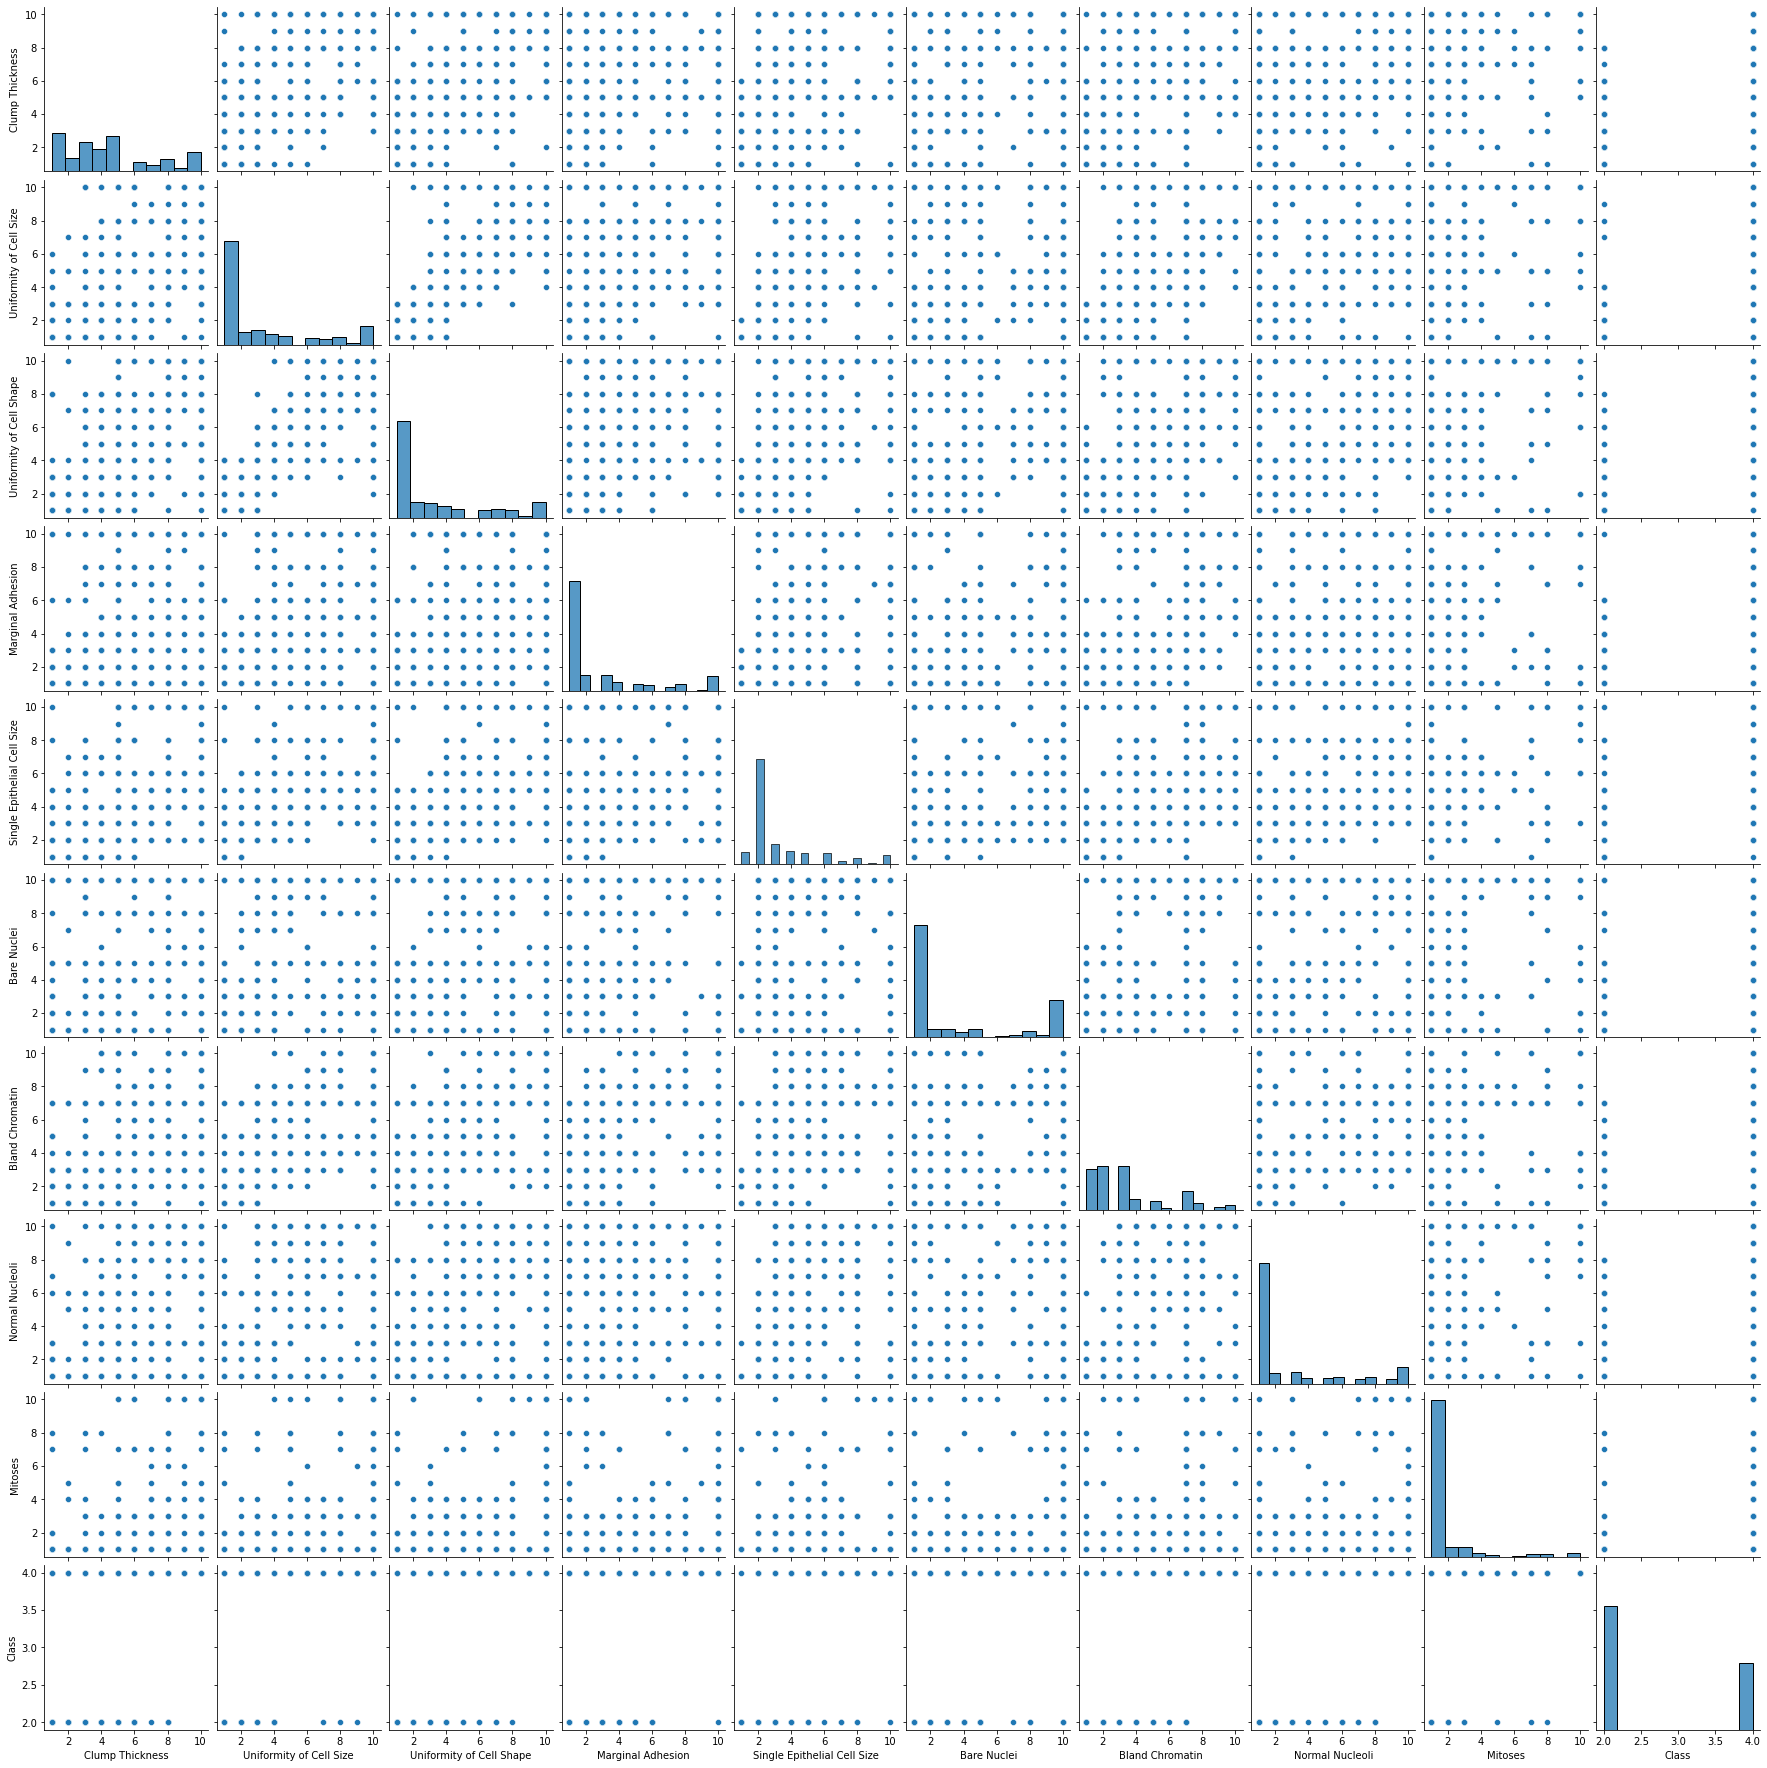

In [35]:
sns.pairplot(df)

In [21]:
df.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


<AxesSubplot:>

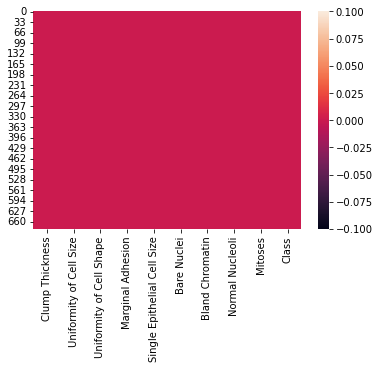

In [22]:
sns.heatmap(df.isnull())

<AxesSubplot:>

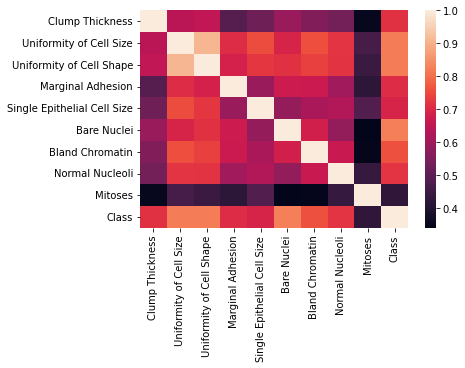

In [41]:
sns.heatmap(df.corr())

In [23]:
df.columns

Index(['Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [24]:
X=df[['Clump Thickness', 'Uniformity of Cell Size','Uniformity of Cell Shape', 'Marginal Adhesion','Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin','Normal Nucleoli', 'Mitoses']]
y=df["Class"]

In [25]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [28]:
from sklearn.linear_model import LogisticRegression

In [31]:
log=LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [33]:
predictions=log.predict(X_test)

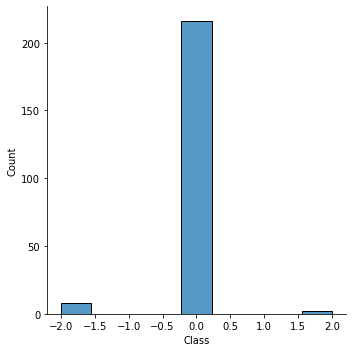

In [34]:
sns.displot((predictions-y_test))

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Class', ylabel='Density'>

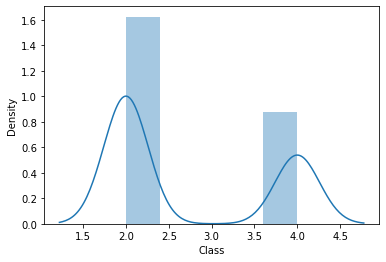

In [36]:
sns.distplot(df["Class"])

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

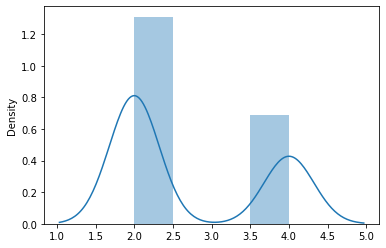

In [37]:
sns.distplot(predictions)

In [38]:
from sklearn.metrics import classification_report

In [40]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           2       0.99      0.95      0.97       148
           4       0.90      0.97      0.94        78

    accuracy                           0.96       226
   macro avg       0.95      0.96      0.95       226
weighted avg       0.96      0.96      0.96       226

